In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv('train.csv')
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [3]:
df.Podcast_Name.unique()

array(['Mystery Matters', 'Joke Junction', 'Study Sessions',
       'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds',
       'News Roundup', 'Daily Digest', 'Music Matters', 'Sports Central',
       'Melody Mix', 'Game Day', 'Gadget Geek', 'Global News',
       'Tech Talks', 'Sport Spot', 'Funny Folks', 'Sports Weekly',
       'Business Briefs', 'Tech Trends', 'Innovators', 'Health Hour',
       'Comedy Corner', 'Sound Waves', 'Brain Boost', "Athlete's Arena",
       'Wellness Wave', 'Style Guide', 'World Watch', 'Humor Hub',
       'Money Matters', 'Healthy Living', 'Home & Living',
       'Educational Nuggets', 'Market Masters', 'Learning Lab',
       'Lifestyle Lounge', 'Crime Chronicles', 'Detective Diaries',
       'Life Lessons', 'Current Affairs', 'Finance Focus', 'Laugh Line',
       'True Crime Stories', 'Business Insights', 'Fashion Forward',
       'Tune Time'], dtype=object)

In [4]:
df.Podcast_Name.describe()

count         750000
unique            48
top       Tech Talks
freq           22847
Name: Podcast_Name, dtype: object

In [5]:
df.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

Correlation between Episode_Length_minutes and Listening_Time_minutes: 0.9167
Linear Model: Listening_Time_minutes = 0.7582 * Episode_Length_minutes + -3.1721
RMSE: 10.89


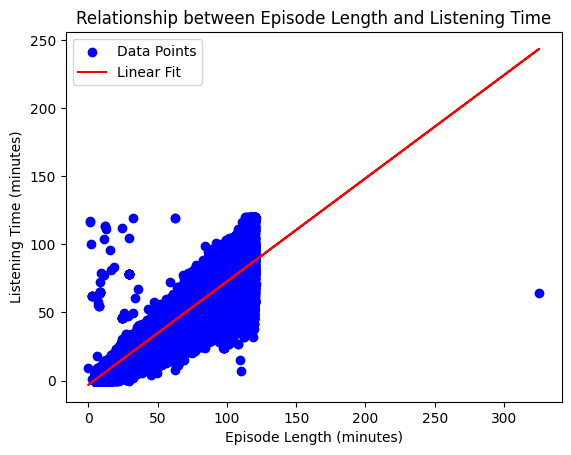

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_clean = df.dropna(subset=['Episode_Length_minutes', 'Listening_Time_minutes'])

correlation = np.corrcoef(df_clean['Episode_Length_minutes'], df_clean['Listening_Time_minutes'])[0, 1]

print(f"Correlation between Episode_Length_minutes and Listening_Time_minutes: {correlation:.4f}")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_clean['Episode_Length_minutes'].values.reshape(-1, 1)
y = df_clean['Listening_Time_minutes'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Model: Listening_Time_minutes = {slope:.4f} * Episode_Length_minutes + {intercept:.4f}")

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.2f}")

plt.scatter(df_clean['Episode_Length_minutes'], df_clean['Listening_Time_minutes'], color='blue', label='Data Points')
plt.plot(df_clean['Episode_Length_minutes'], y_pred, color='red', label='Linear Fit')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.title('Relationship between Episode Length and Listening Time')
plt.legend()
plt.show()

In [7]:
df2 = df 
df2['Episode_Length_minutes'] = df2.apply(
    lambda row: row['Listening_Time_minutes'] / 0.728 if pd.isna(row['Episode_Length_minutes']) else row['Episode_Length_minutes'],
    axis=1
)
df2.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes              0
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

<Figure size 1000x600 with 0 Axes>

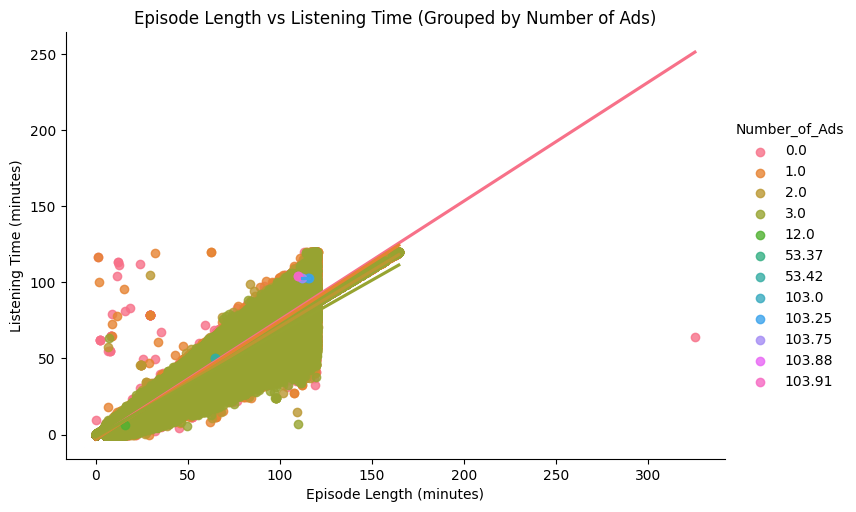

In [8]:
plt.figure(figsize=(10, 6))

sn.lmplot(x="Episode_Length_minutes", y="Listening_Time_minutes", 
           hue="Number_of_Ads", data=df2, aspect=1.5)

plt.title("Episode Length vs Listening Time (Grouped by Number of Ads)")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")

plt.show()

In [9]:
def count_feature(df, feature):
    return df[feature].value_counts()


In [10]:
counts = count_feature(df2, 'Number_of_Ads')
counts

Number_of_Ads
0.00      217592
1.00      214069
3.00      160173
2.00      158156
103.25         2
53.37          1
103.00         1
103.91         1
53.42          1
103.75         1
12.00          1
103.88         1
Name: count, dtype: int64

In [11]:
df3 = df2[df2['Number_of_Ads']<4]
df3

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.660000,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.750000,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.980000,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.980000,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [12]:
df4 = df3[df3['Listening_Time_minutes']<=df3['Episode_Length_minutes']]
df4.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [13]:
df4['Genre'].head()

0    True Crime
1        Comedy
2     Education
3    Technology
4        Health
Name: Genre, dtype: object

C:\Users\User\AppData\Local\Temp\ipykernel_4920\1503886459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Listening_Percentage'] = (df4['Listening_Time_minutes'] / df4['Episode_Length_minutes']) * 100


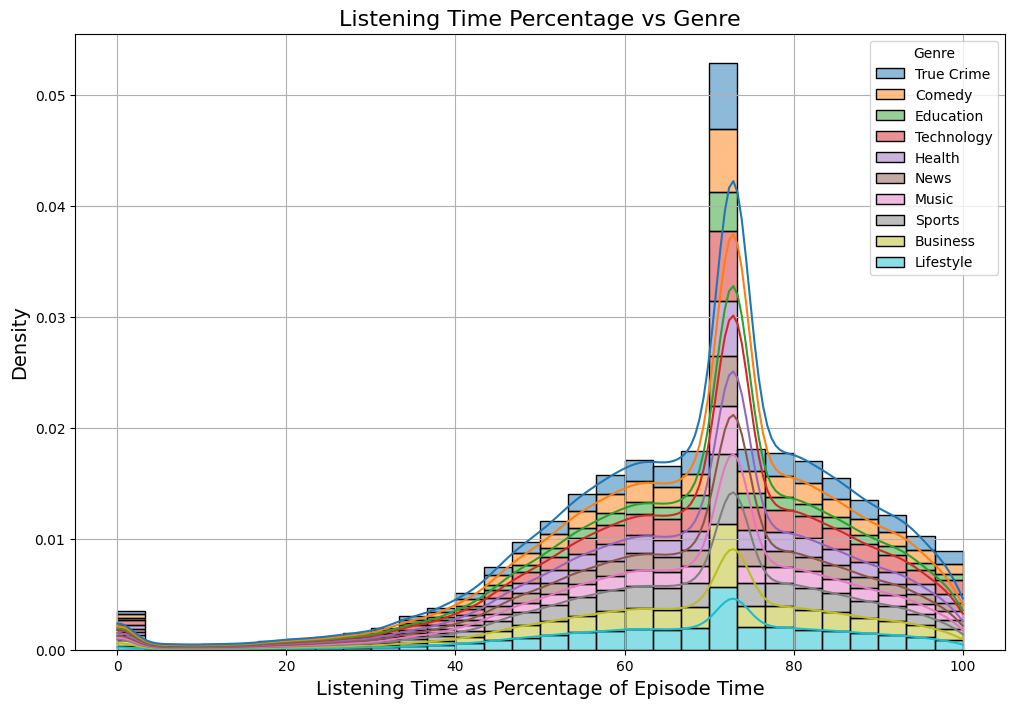

In [14]:
df4['Listening_Percentage'] = (df4['Listening_Time_minutes'] / df4['Episode_Length_minutes']) * 100

plt.figure(figsize=(12, 8))

sn.histplot(df4, x='Listening_Percentage', hue='Genre', kde=True, multiple="stack", bins=30, stat='density')

plt.title('Listening Time Percentage vs Genre', fontsize=16)
plt.xlabel('Listening Time as Percentage of Episode Time', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

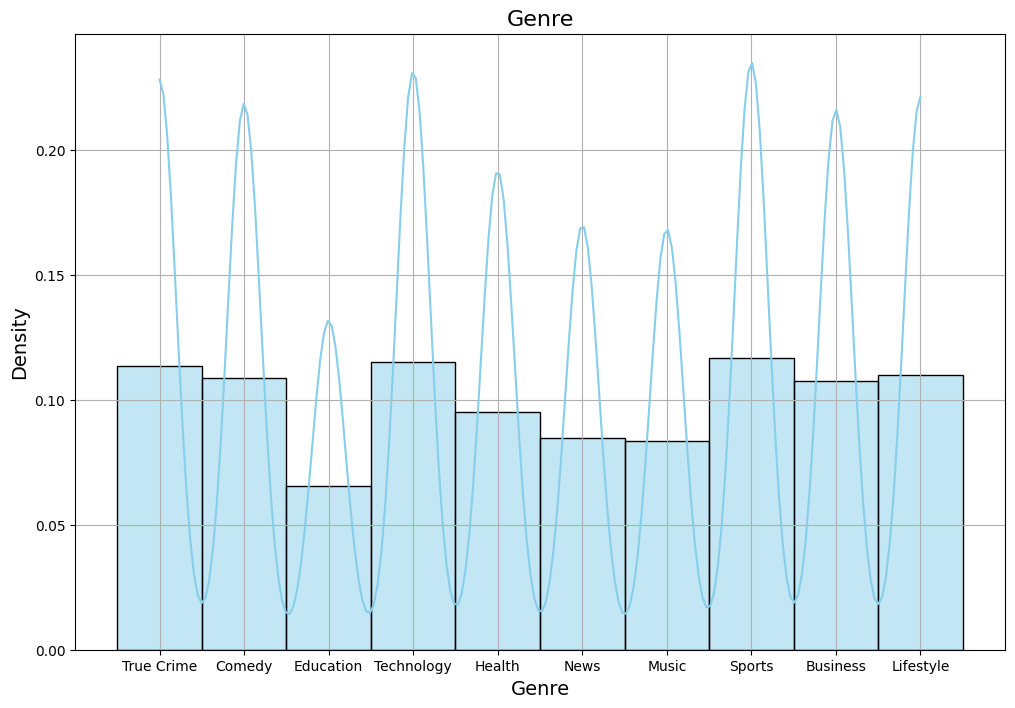

In [15]:
plt.figure(figsize=(12, 8))

sn.histplot(df4['Genre'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [16]:
df4.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes              0
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    145541
Number_of_Ads                       0
Episode_Sentiment                   0
Listening_Time_minutes              0
Listening_Percentage              710
dtype: int64

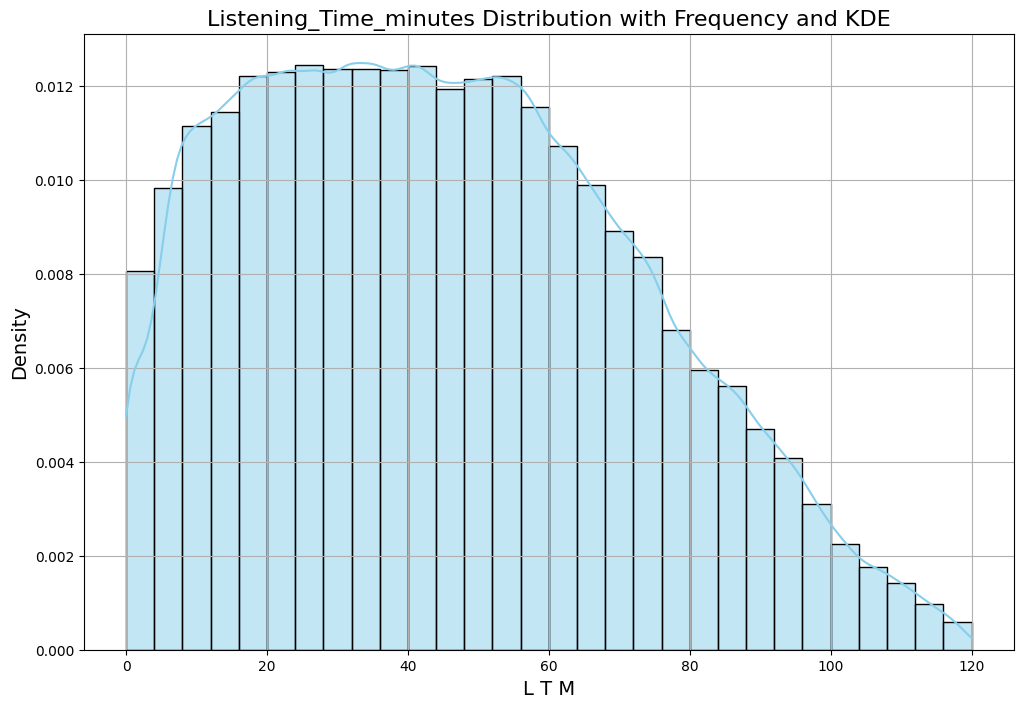

In [17]:
plt.figure(figsize=(12, 8))

sn.histplot(df4['Listening_Time_minutes'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Listening_Time_minutes Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('L T M', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

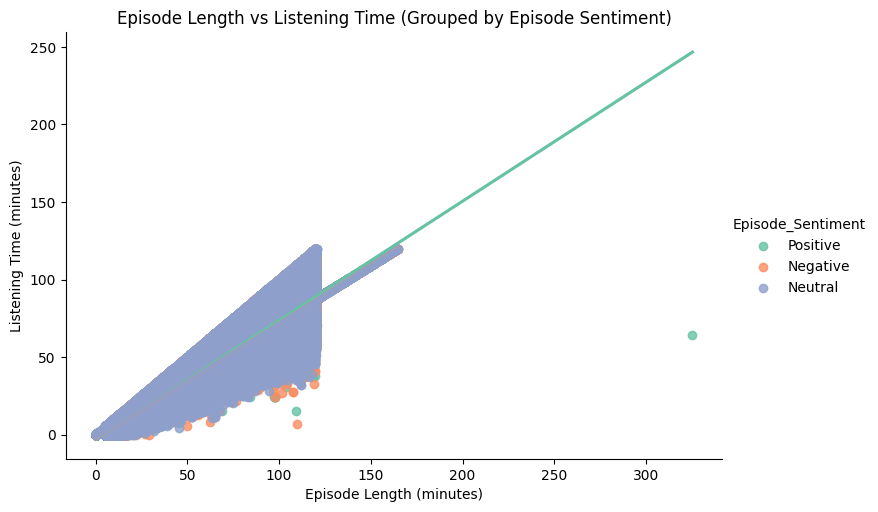

In [18]:
plt.figure(figsize=(10, 6))
sn.lmplot(x="Episode_Length_minutes", y="Listening_Time_minutes", 
           hue="Episode_Sentiment", data=df4, aspect=1.5, palette="Set2")
plt.title("Episode Length vs Listening Time (Grouped by Episode Sentiment)")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")
plt.show()

In [19]:
df4['Episode_Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [20]:
df4

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Percentage
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,72.800000
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,73.466119
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,60.792030
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,68.897186
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,68.419428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.660000,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,75.165979
749996,749996,Business Briefs,Episode 21,75.750000,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,60.016396
749997,749997,Lifestyle Lounge,Episode 51,30.980000,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,49.257586
749998,749998,Style Guide,Episode 47,108.980000,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,92.429244


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding using .loc to avoid the warning
df4.loc[:, 'Genre_encoded'] = label_encoder.fit_transform(df4['Genre'])
df4.loc[:, 'Episode_Sentiment_encoded'] = label_encoder.fit_transform(df4['Episode_Sentiment'])

# Display the updated dataframe with encoded columns
print(df4[['Genre', 'Genre_encoded', 'Episode_Sentiment', 'Episode_Sentiment_encoded']].head())


        Genre  Genre_encoded Episode_Sentiment  Episode_Sentiment_encoded
0  True Crime              9          Positive                          2
1      Comedy              1          Negative                          0
2   Education              2          Negative                          0
3  Technology              8          Positive                          2
4      Health              3           Neutral                          1


C:\Users\User\AppData\Local\Temp\ipykernel_4920\910073324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'Genre_encoded'] = label_encoder.fit_transform(df4['Genre'])
C:\Users\User\AppData\Local\Temp\ipykernel_4920\910073324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'Episode_Sentiment_encoded'] = label_encoder.fit_transform(df4['Episode_Sentiment'])


In [22]:
df4.head(30)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Percentage,Genre_encoded,Episode_Sentiment_encoded
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,72.800000,9,2
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,73.466119,1,0
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,60.792030,2,0
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,68.897186,8,2
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,68.419428,3,1
5,5,Fitness First,Episode 19,26.540000,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047,85.796797,3,2
6,6,Criminal Minds,Episode 47,69.830000,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024,92.725533,9,1
7,7,News Roundup,Episode 44,48.520000,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517,46.115354,6,2
8,8,Daily Digest,Episode 32,105.870000,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124,64.230887,6,1
9,9,Music Matters,Episode 81,63.114849,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761,72.800000,5,1


In [38]:
df4 = df4.sort_values('Listening_Time_minutes', ascending=False)

In [43]:
x_init = df4[['Episode_Length_minutes','Genre_encoded','Number_of_Ads','Episode_Sentiment_encoded','Listening_Time_minutes']]
x_init.shape

(747422, 5)

In [46]:
x_clean = x_init.drop_duplicates(keep='first')
print('x_clean', x_clean.shape)
y=x_clean.Listening_Time_minutes
x = x_clean[['Episode_Length_minutes','Genre_encoded','Number_of_Ads','Episode_Sentiment_encoded']]
print(x.shape)
print(len(y))

x_clean (688456, 5)
(688456, 4)
688456


In [51]:
duplicates_in_x = x.duplicated()
print("Number of duplicate rows in x:", duplicates_in_x.sum())
print("duplicate check for x ", x[duplicates_in_x])
combined = x.copy()
combined['Listening_Time_minutes'] = y.values  
combined_clean = combined.drop_duplicates(subset=['Episode_Length_minutes', 'Genre_encoded', 'Number_of_Ads', 'Episode_Sentiment_encoded'])
x = combined_clean[['Episode_Length_minutes', 'Genre_encoded', 'Number_of_Ads', 'Episode_Sentiment_encoded']]
y = combined_clean['Listening_Time_minutes']
print(x.shape)
print(len(y))

Number of duplicate rows in x: 0
duplicate check for x  Empty DataFrame
Columns: [Episode_Length_minutes, Genre_encoded, Number_of_Ads, Episode_Sentiment_encoded]
Index: []
(512335, 4)
512335


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

def find_best_model_and_estimators(X_train, y_train):
    model_params = {
        'random_forest': {
            'model': RandomForestRegressor(), 
            'params': {
                'randomforestregressor__n_estimators': [50],
                'randomforestregressor__max_depth': [10],
                'randomforestregressor__min_samples_split': [2],
                'randomforestregressor__min_samples_leaf': [2],
                'randomforestregressor__criterion': ['squared_error'],
                'randomforestregressor__bootstrap': [False],
            }
        }
    }

    scores = []
    best_estimators = {}

    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

    for algo, mp in model_params.items():
        pipe = make_pipeline(StandardScaler(), mp['model'])
        clf = GridSearchCV(pipe, mp['params'], cv=cv, return_train_score=False, n_jobs=-1)
        clf.fit(X_train, y_train)
        
        # Make predictions on the training set to compute RMSE
        y_pred = clf.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_train, y_pred))
        
        scores.append({
            'model': algo,
            'RMSE': rmse,
            'best_params': clf.best_params_
        })
        
        best_estimators[algo] = clf.best_estimator_

    return pd.DataFrame(scores, columns=['model', 'RMSE', 'best_params']), best_estimators


In [ ]:
best_scores, best_estimators = find_best_model_and_estimators(x, y)
print(best_scores)
print(best_estimators)